### First we need to download the dependency files 

This will download, unzip then clean up 

In [ ]:
# Setup, download, unzip
!wget -qq https://www.dropbox.com/s/4wdgtnr4z950hcf/notebook1.zip 
!unzip -qq notebook1.zip

!rm -r __MACOSX


In [ ]:
ls

diagram12.gif  diagram4f.png  diagram6d.png  sample_data/  sutils.py
diagram3c.gif  diagram5g.png  notebook1.zip  solutions/


# Your first tf.keras Network

4 Building Blocks:

- Data for inputs and labels
- Architecture
- Loss
- Optimizer



In [ ]:
#imports 
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD 

from tensorflow.keras.utils import plot_model

In [ ]:
#versions
print(tf.__version__)
print(tf.keras.__version__)

2.7.0
2.7.0


### Lets import our dataset

In [ ]:
# import MNIST
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#examine what the first image looks like
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# the first label
y_train[0]

5

## Preparing the data for a basic network

In [ ]:
# changing the shape of our data to be flat vectors instead of matrices
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# Converting the ints to float for floating point math
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Standardizing the data to be between 0-1 --- Be careful to only do this once
x_train /=255.0
x_test /=255.0


print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [ ]:
#examine what the first image looks like
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# first label
y_train[0]

5

### Making One Hot Encoded vectors

In [ ]:
# number of classes
n_classes = 10

# Convert Class Scalars to  One Hot Encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [ ]:
# look at our label now
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# lets check our tensor shape
y_train.shape

(60000, 10)

## Plotting some examples

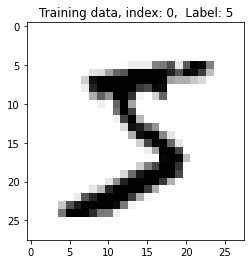

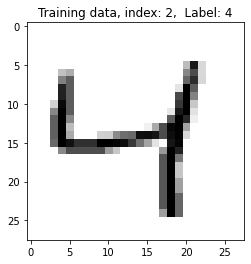

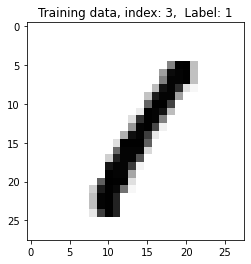

In [ ]:
# Method for displaying the number as a picture

def show_digit(index):
    label = y_train[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = x_train[index].reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
def show_predicted_digit(image, pred, label):
    # Reshape 784 array into 28x28 image
    image = image.reshape([28,28])
    plt.title('Original Image, Pred: %d,  True Label: %d' %(pred, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
show_digit(0)
show_digit(2)
show_digit(3)

### Setting up our Network Hyper Parameters

In [ ]:
# Training Parameters for basic MNIST
learning_rate = 0.001
training_epochs = 10
batch_size = 100

# Network Parameters
n_input = 784 ## MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 392  # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_classes =  10 # MNIST classes for prediction(digits 0-9 )

## Lets build our first network



In [ ]:
# building the model
Inp = Input(shape=(784,), name='Input')
x = Dense(n_hidden_1, activation='relu', name='Dense_01')(Inp)
x = Dense(n_hidden_2, activation='relu', name='Dense_02')(x)
outputs = Dense(n_classes,activation='softmax', name='Outputs')(x)

model = Model(Inp, outputs, name='basic_mnist_model')

In [ ]:
# lets look at the model
model.summary()


Model: "basic_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 784)]             0         
                                                                 
 Dense_01 (Dense)            (None, 392)               307720    
                                                                 
 Dense_02 (Dense)            (None, 100)               39300     
                                                                 
 Outputs (Dense)             (None, 10)                1010      
                                                                 
Total params: 348,030
Trainable params: 348,030
Non-trainable params: 0
_________________________________________________________________


## Create the optimizer and compile the graph

In [ ]:
# setting up our Optimizer
opt = SGD(learning_rate=learning_rate)

In [ ]:
# compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics= ['accuracy'])

## Training time

we fit the model using the data we pass in to it 

AKA training the model

In [ ]:
# train the model
model.fit(x_train, y_train, 
          batch_size=batch_size,
          epochs=training_epochs,
          verbose=1,
          validation_data= (x_test, y_test))

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 2.0957 - accuracy: 0.3641 - val_loss: 1.8472 - val_accuracy: 0.6117
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 1.6280 - accuracy: 0.6742 - val_loss: 1.3856 - val_accuracy: 0.7257
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 1.2245 - accuracy: 0.7507 - val_loss: 1.0398 - val_accuracy: 0.7901
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.9507 - accuracy: 0.7995 - val_loss: 0.8271 - val_accuracy: 0.8236
Epoch 5/10
600/600 [==============================] - 3s 4ms/step - loss: 0.7845 - accuracy: 0.8271 - val_loss: 0.6985 - val_accuracy: 0.8444
Epoch 6/10
600/600 [==============================] - 3s 4ms/step - loss: 0.6802 - accuracy: 0.8430 - val_loss: 0.6144 - val_accuracy: 0.8581
Epoch 7/10
600/600 [==============================] - 3s 4ms/step - loss: 0.6097 - accuracy: 0.8545 - val_loss: 0.5561 - val_accuracy: 0.8693
Epoch 

In [ ]:
# evaluate the model
score = model.evaluate(x_test, y_test)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4539 - accuracy: 0.8862
Test loss: 0.4538508355617523
Test accuracy: 0.8862000107765198


## We can train more


In [ ]:
model.summary()

Model: "basic_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 784)]             0         
                                                                 
 Dense_01 (Dense)            (None, 392)               307720    
                                                                 
 Dense_02 (Dense)            (None, 100)               39300     
                                                                 
 Outputs (Dense)             (None, 10)                1010      
                                                                 
Total params: 348,030
Trainable params: 348,030
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model
model.fit(x_train, y_train, 
          batch_size=batch_size,
          epochs=training_epochs,
          verbose=1,
          validation_data= (x_test, y_test))

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4662 - accuracy: 0.8802 - val_loss: 0.4323 - val_accuracy: 0.8906
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4461 - accuracy: 0.8844 - val_loss: 0.4147 - val_accuracy: 0.8949
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.4291 - accuracy: 0.8878 - val_loss: 0.3998 - val_accuracy: 0.8974
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4146 - accuracy: 0.8906 - val_loss: 0.3871 - val_accuracy: 0.8994
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.4020 - accuracy: 0.8940 - val_loss: 0.3759 - val_accuracy: 0.9009
Epoch 6/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3910 - accuracy: 0.8960 - val_loss: 0.3660 - val_accuracy: 0.9023
Epoch 7/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3812 - accuracy: 0.8981 - val_loss: 0.3575 - val_accuracy: 0.9042
Epoch 